# Introduction to Regression with statsmodels in Python

### Libraries and datasets

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

taiwan_real_estate = pd.read_csv('datasets/taiwan_real_estate2.csv')
sp500_yearly_returns = pd.read_csv('datasets/sp500_yearly_returns.csv')
ad_conversion = pd.read_csv('datasets/ad_conversion.csv')

## 1. Simple Linear Regression Modeling

### Visualizing two numeric variables
Instructions:
<ul>
<li>Import the seaborn package, aliased as sns.</li>
<li>Using taiwan_real_estate, draw a scatter plot of "price_twd_msq" (y-axis) versus "n_convenience" (x-axis).</li>
<li>Draw a trend line calculated using linear regression. Omit the confidence interval ribbon. Note: The scatter_kws argument, pre-filled in the exercise, makes the data points 50% transparent.</li>
</ul>

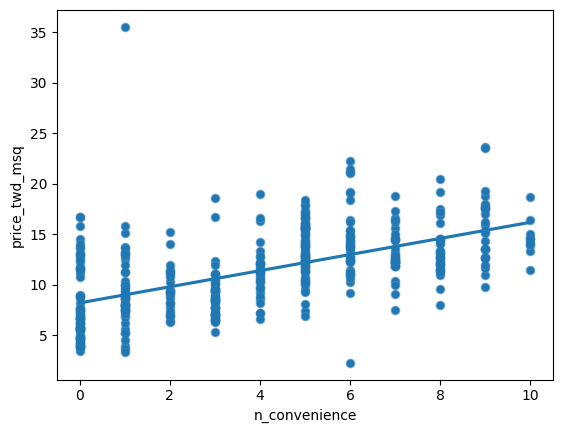

In [2]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience',
         y='price_twd_msq',
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

### Linear regression with ols()
Instructions:
<ul>
<li>Import the ols() function from the statsmodels.formula.api package.</li>
<li>Run a linear regression with price_twd_msq as the response variable, n_convenience as the explanatory variable, and taiwan_real_estate as the dataset. Name it mdl_price_vs_conv.</li>
<li>Fit the model.</li>
<li>Print the parameters of the fitted model.</li>
</ul>

In [3]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


### Visualizing numeric vs. categorical
Instructions:
<ul>
<li>Using taiwan_real_estate, plot a histogram of price_twd_msq with 10 bins. Split the plot by house_age_years to give 3 panels.</li>
</ul>

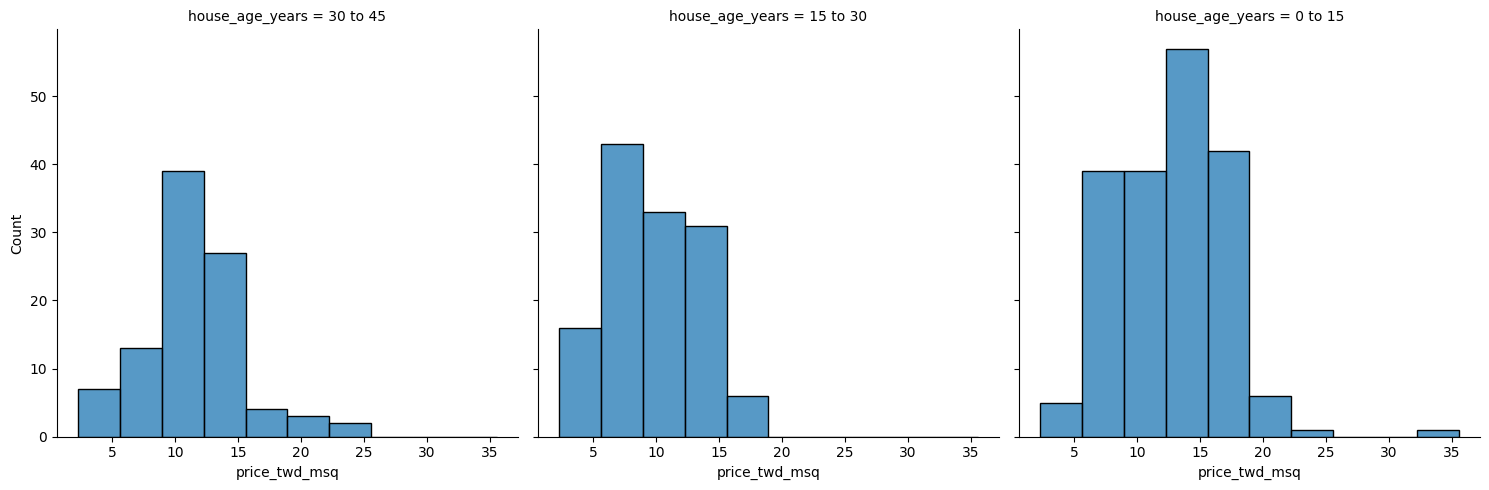

In [4]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         col='house_age_years',
         bins=10)

# Show the plot
plt.show()

### Calculating means by category
Instructions:
<ul>
<li>Group taiwan_real_estate by house_age_years and calculate the mean price (price_twd_msq) for each age group. Assign the result to mean_price_by_age.</li>
<li>Print the result and inspect the output.</li>
</ul>

In [5]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


### Linear regression with a categorical explanatory variable
Instructions:
<ul>
<li>Run and fit a linear regression with price_twd_msq as the response variable, house_age_years as the explanatory variable, and taiwan_real_estate as the dataset. Assign to mdl_price_vs_age.</li>
<li>Print its parameters.</li>
<li>Update the model formula so that no intercept is included in the model. Assign to mdl_price_vs_age0.</li>
<li>Print its parameters.</li>
</ul>

In [6]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64
house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


## 2. Predictions and model objects

### Predicting house prices
Instructions:
<ul>
<li>Import the numpy package using the alias np.</li>
<li>Create a DataFrame of explanatory data, where the number of convenience stores, n_convenience, takes the integer values from zero to ten.</li>
<li>Print explanatory_data.</li>
<li>Use the model mdl_price_vs_conv to make predictions from explanatory_data and store it as price_twd_msq.</li>
<li>Print the predictions.</li>
<li>Create a DataFrame of predictions named prediction_data. Start with explanatory_data, then add an extra column, price_twd_msq, containing the predictions you created in the previous step.</li>
</ul>

In [7]:
# Import numpy with alias np
import numpy as np

# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create prediction_data
prediction_data = explanatory_data.assign(price_twd_msq=price_twd_msq)

# Print the result
display(prediction_data)

,n_convenience,price_twd_msq
0,0,8.224237
1,1,9.022317
2,2,9.820397
3,3,10.618477
4,4,11.416556
5,5,12.214636
6,6,13.012716
7,7,13.810795
8,8,14.608875
9,9,15.406955


### Visualizing predictions
Instructions:
<ul>
<li>Create a new figure to plot multiple layers.</li>
<li>Extend the plotting code to add points for the predictions in prediction_data. Color the points red.</li>
<li>Display the layered plot.</li>
</ul>

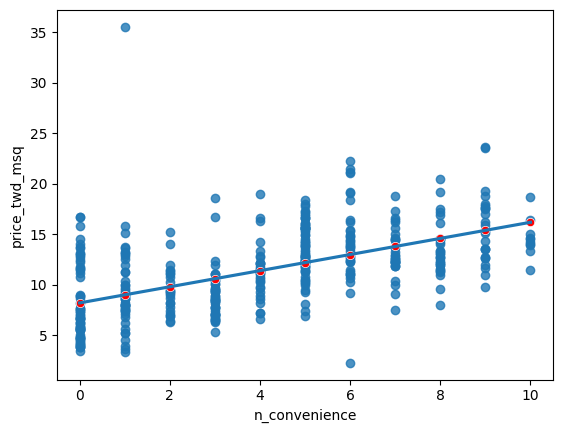

In [8]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
            
# Add a scatter plot layer to the regplot
sns.scatterplot(x='n_convenience', y='price_twd_msq', data=prediction_data, color='red')

# Show the layered plot
plt.show()

### The limits of prediction
Instructions:
<ul>
<li>Create some impossible explanatory data. Define a DataFrame impossible with one column, n_convenience, set to -1 in the first row, and 2.5 in the second row.</li>
<li>Try making predictions on your two impossible cases. What happens?</li>
</ul>

In [9]:
# Define a DataFrame impossible
impossible = pd.DataFrame({'n_convenience':[-1, 2.5]})

# Predict
mdl_price_vs_conv.predict(impossible)

# The model successfully gives a prediction about cases that are impossible in real life.
# i.e. Linear models don't know what is possible or not in real life.

0     7.426158
1    10.219437
dtype: float64

### Extracting model elements
Instructions:
<ul>
<li>Print the parameters of mdl_price_vs_conv.</li>
<li>Print the fitted values of mdl_price_vs_conv.</li>
<li>Print the residuals of mdl_price_vs_conv.</li>
<li>Print a summary of mdl_price_vs_conv.</li>
</ul>

In [10]:
# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params, "\n")

# Print the fitted values of mdl_price_vs_conv
display(mdl_price_vs_conv.fittedvalues)

# Print the residuals of mdl_price_vs_conv
display(mdl_price_vs_conv.resid)

# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

Intercept        8.224237
n_convenience    0.798080
dtype: float64 



0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           3.41e-37
Time:                        20:17:38   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

### Manually predicting house prices
Instructions:
<ul>
<li>Get the coefficients/parameters of mdl_price_vs_conv, assigning to coeffs.</li>
<li>Get the intercept, which is the first element of coeffs, assigning to intercept.</li>
<li>Get the slope, which is the second element of coeffs, assigning to slope.</li>
<li>Manually predict price_twd_msq using the formula, specifying the intercept, slope, and explanatory_data.</li>
<li>Run the code to compare your manually calculated predictions to the results from .predict().</li>
</ul>

In [11]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


### Plotting consecutive portfolio returns
Instructions:
<ul>
<li>Create a new figure, fig, to enable plot layering.</li>
<li>Generate a line at y equals x. This has been done for you.</li>
<li>Using sp500_yearly_returns, draw a scatter plot of return_2019 vs. return_2018 with a linear regression trend line, without a standard error ribbon.</li>
<li>Set the axes so that the distances along the x and y axes look the same.</li>
</ul>

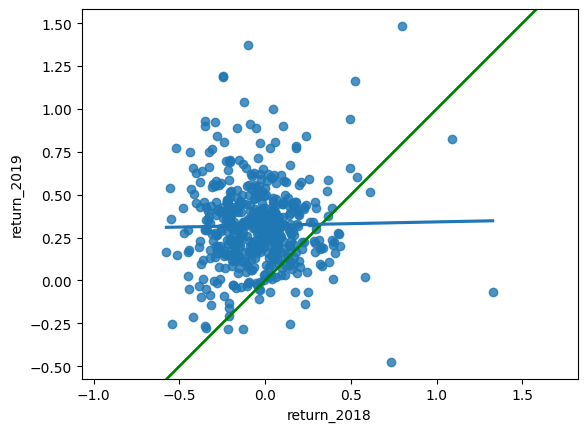

In [12]:
# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x='return_2018', y='return_2019', data=sp500_yearly_returns, ci=None)

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

# Show the plot
plt.show()

### Modeling consecutive returns
Instructions:
<ul>
<li>Run a linear regression on return_2019 versus return_2018 using sp500_yearly_returns and fit the model. Assign to mdl_returns.</li>
<li>Print the parameters of the model.</li>
<li>Create a DataFrame named explanatory_data. Give it one column (return_2018) with 2018 returns set to a list containing -1, 0, and 1.</li>
<li>Use mdl_returns to predict with explanatory_data in a print() call.</li>
</ul>

In [13]:
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols('return_2019 ~ return_2018', data=sp500_yearly_returns).fit()

# Print the parameters
print(mdl_returns.params)

# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({'return_2018':[-1,0,1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

Intercept      0.321321
return_2018    0.020069
dtype: float64
0    0.301251
1    0.321321
2    0.341390
dtype: float64


### Transforming the explanatory variable
Instructions:
<ul>
<li>Look at the plot.</li>
<li>Add a new column to taiwan_real_estate called sqrt_dist_to_mrt_m that contains the square root of dist_to_mrt_m.</li>
<li>Create the same scatter plot as the first one, but use the new transformed variable on the x-axis instead.</li>
<li>Look at the new plot. Notice how the numbers on the x-axis have changed. This is a different line to what was shown before. Do the points track the line more closely?</li>
<li>Run a linear regression of price_twd_msq versus the square root of dist_to_mrt_m using taiwan_real_estate.</li>
<li>Print the parameters.</li>
<li>Create a DataFrame of predictions named prediction_data by adding a column of predictions called price_twd_msq to explanatory_data. Predict using mdl_price_vs_dist and explanatory_data.</li>
<li>Print the predictions.</li>
<li>Add a layer to your plot containing points from prediction_data, colored "red".</li>
</ul>

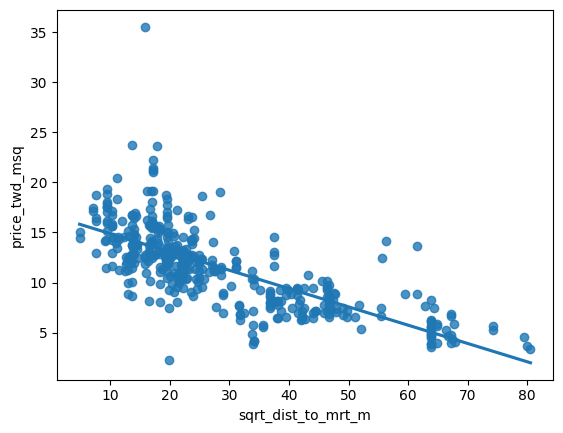

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64 



,sqrt_dist_to_mrt_m,dist_to_mrt_m,price_twd_msq
0,0.0,0,16.709799
1,10.0,100,14.881370
2,20.0,400,13.052942
3,30.0,900,11.224513
4,40.0,1600,9.396085
5,50.0,2500,7.567656
6,60.0,3600,5.739227
7,70.0,4900,3.910799
8,80.0,6400,2.082370


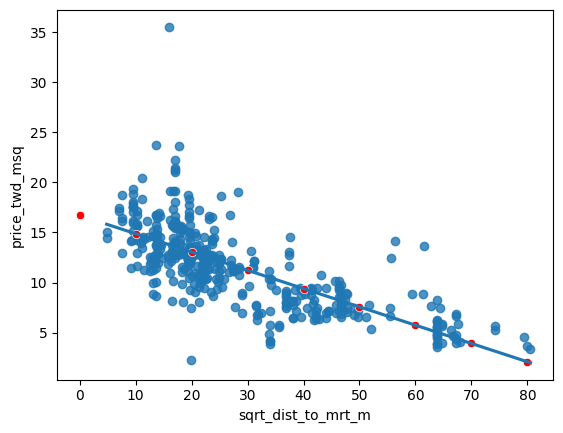

In [14]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

plt.figure()

# Plot using the transformed variable
sns.regplot(x='sqrt_dist_to_mrt_m', y='price_twd_msq', data=taiwan_real_estate, ci=None)
plt.show()

# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols('price_twd_msq ~ sqrt_dist_to_mrt_m', data=taiwan_real_estate).fit()

# Print the parameters
print(mdl_price_vs_dist.params, "\n")

explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2), "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_dist.predict(explanatory_data))

# Print the result
display(prediction_data)

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x='sqrt_dist_to_mrt_m', y='price_twd_msq', data=prediction_data, color='red')
plt.show()

### Transforming the response variable too
Instructions:
<ul>
<li>Look at the plot.</li>
<li>Create a qdrt_n_impressions column using n_impressions raised to the power of 0.25.</li>
<li>Create a qdrt_n_clicks column using n_clicks raised to the power of 0.25.</li>
<li>Create a regression plot using the transformed variables. Do the points track the line more closely?</li>
<li>Run a linear regression of qdrt_n_clicks versus qdrt_n_impressions using ad_conversion and assign it to mdl_click_vs_impression.</li>
<li>Complete the code to create the prediction data.</li>
</ul>

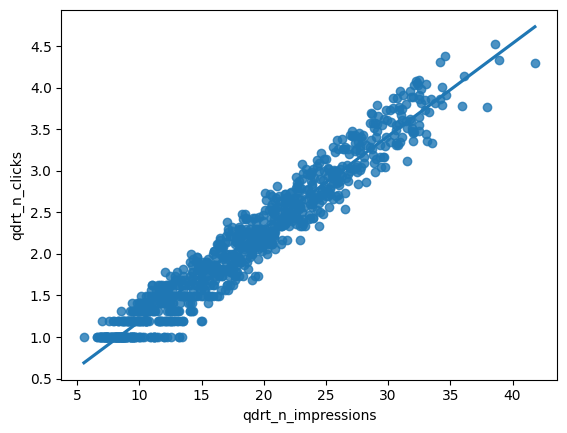

,qdrt_n_impressions,n_impressions,qdrt_n_clicks
0,0.000000,0.0,0.071748
1,26.591479,500000.0,3.037576
2,31.622777,1000000.0,3.598732
3,34.996355,1500000.0,3.974998
4,37.606031,2000000.0,4.266063
5,39.763536,2500000.0,4.506696
6,41.617915,3000000.0,4.713520


In [15]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion['n_impressions'] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

plt.figure()

# Plot using the transformed variables
sns.regplot(x='qdrt_n_impressions', y='qdrt_n_clicks', data = ad_conversion, ci=None)
plt.show()

# Run a linear regression of your transformed variables
mdl_click_vs_impression = ols('qdrt_n_clicks ~ qdrt_n_impressions', data=ad_conversion).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25, "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data))

# Print the result
display(prediction_data)

### Back transformation
Instructions:
<ul>
<li>Back transform the response variable in prediction_data by raising qdrt_n_clicks to the power 4 to get n_clicks.</li>
<li>Edit the plot to add a layer of points from prediction_data, colored "red".</li>
</ul>

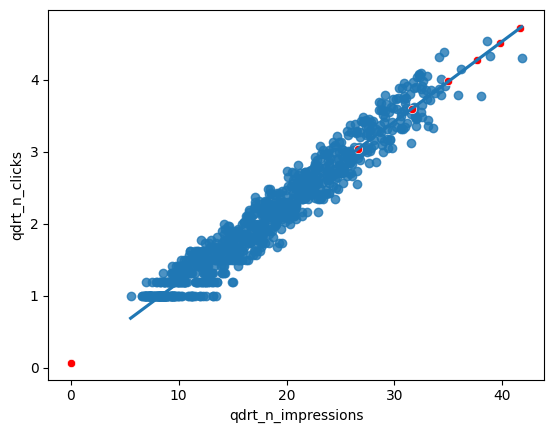

In [16]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x='qdrt_n_impressions', y='qdrt_n_clicks', data=prediction_data, color='red')
plt.show()

## 3. Assessing model fit

### Coefficient of determination
Instructions:
<ul>
<li>Print the summary of mdl_click_vs_impression_orig.</li>
<li>Do the same for mdl_click_vs_impression_trans.</li>
<li>Print the coefficient of determination for mdl_click_vs_impression_orig.</li>
<li>Do the same for mdl_click_vs_impression_trans.</li>
</ul>

In [17]:
mdl_click_vs_impression_orig = ols('n_clicks ~ n_impressions', data=ad_conversion).fit()

In [18]:
# Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())

# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression.summary())

# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression.rsquared)

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:17:39   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

### Residual standard error
Instructions:
<ul>
<li>Calculate the MSE of mdl_click_vs_impression_orig, assigning to mse_orig.</li>
<li>Using mse_orig, calculate and print the RSE of mdl_click_vs_impression_orig.</li>
<li>Do the same for mdl_click_vs_impression_trans.</li>
</ul>

In [19]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875722


### Drawing diagnostic plots
Instructions:
<ul>
<li>Create the residuals versus fitted values plot. Add a lowess argument to visualize the trend of the residuals.</li>
<li>Import qqplot() from statsmodels.api.</li>
<li>Create the Q-Q plot of the residuals.</li>
<li>Create the scale-location plot.</li>
</ul>

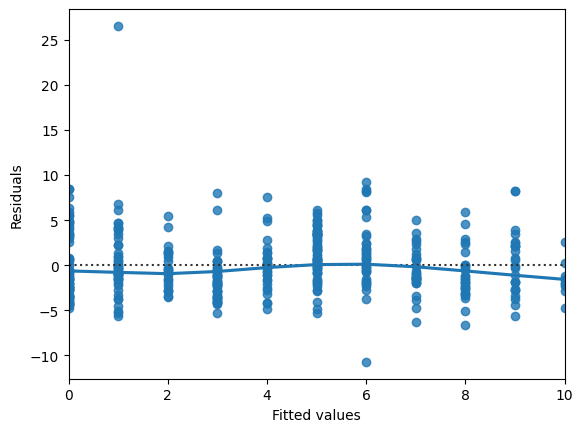

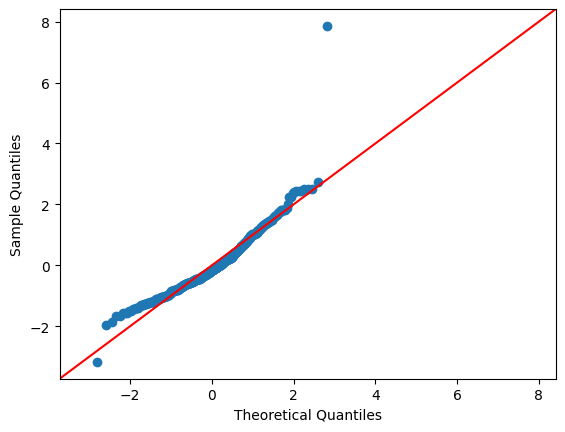

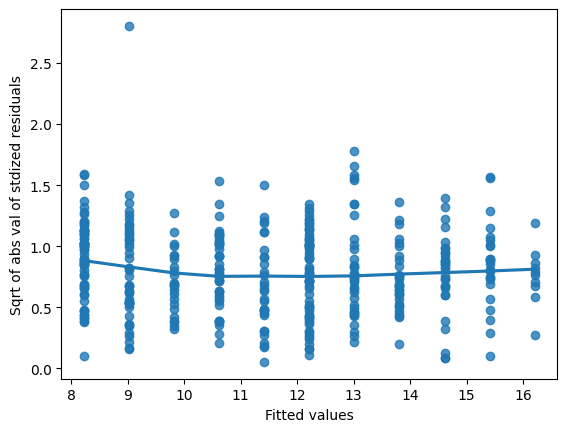

In [22]:
# Plot the residuals vs. fitted values
sns.residplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

## 4. Simple Logistic Regression Modeling